In [30]:
# import osmnx as ox
import pandas as pd
# import numpy as np
import geopandas as gpd
from shapely.geometry import Point,LineString
import matplotlib.pyplot as plt

# importing required modules
from zipfile import ZipFile
import requests

from io import StringIO,BytesIO


In [4]:
# try:
#     open('./MBTA_GTFS.zip', 'wb').close()
# except:
#     ## Down load data from MBTA
url = "https://cdn.mbta.com/MBTA_GTFS.zip"
r = requests.get(url, allow_redirects=True)
open('./MBTA_GTFS.zip', 'wb').write(r.content)
# # finally:
# #     open('./MBTA_GTFS.zip', 'wb').write(r.content)


file_name = "MBTA_GTFS.zip"
gtfs = dict()
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipf:
    for info in zipf.infolist():
        filename = info.filename
        gtfs[filename[:-4]]= pd.read_csv(BytesIO(zipf.read(filename)))
        # pd.read_csv(filename)
        print(info.filename)

agency.txt
calendar.txt
calendar_attributes.txt
calendar_dates.txt
checkpoints.txt
directions.txt
facilities.txt
facilities_properties.txt
facilities_properties_definitions.txt
feed_info.txt
levels.txt
lines.txt
linked_datasets.txt
multi_route_trips.txt
pathways.txt
route_patterns.txt
routes.txt
shapes.txt


/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


stop_times.txt
stops.txt
transfers.txt
trips.txt


/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
gtfs['shapes'].sort_values(shape_pt_sequence).groupby('shape_id')

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,010090,42.329848,-71.083876,10001,NaN
1,010090,42.329788,-71.083268,10002,NaN
2,010090,42.330089,-71.083198,10003,NaN
3,010090,42.330296,-71.083161,10004,NaN
4,010090,42.330493,-71.083112,10005,NaN
...,...,...,...,...,...
262620,b0021,42.301848,-70.922284,46,NaN
262621,b0021,42.301991,-70.920943,47,NaN
262622,b0021,42.302245,-70.920192,48,NaN
262623,b0021,42.302563,-70.919795,49,NaN


In [34]:

# gtfs['shapes'].pipe(find_coordinates).pipe(trans_coordinates).pipe(group_point).apply(LineString)


<AxesSubplot:>

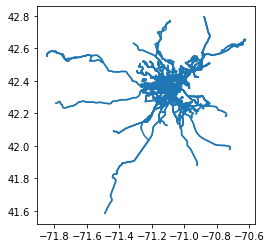

In [35]:
L.plot()

In [52]:
def find_coordinates(df):
    return (
        df
        .assign(
            lat = df.filter(regex=r'lat$').astype(float)
          , lng = df.filter(regex=r'lon$').astype(float)
        )
    )

def trans_coordinates(df):
    return (
        df
        .assign(
            coordinates = pd.Series(zip(df.lng, df.lat)).apply(Point)
        )
    )
def create_gpd_stops(df):
        
    return gpd.GeoDataFrame(
        df
        .pipe(find_coordinates)
        .pipe(trans_coordinates)
        , geometry='coordinates').set_crs("EPSG:4269")

def group_point(df):
    return df.sort_values('shape_pt_sequence').groupby('shape_id')['coordinates'].apply(list)

def create_gpd_lines(df):
        
    return gpd.GeoDataFrame(
        df
        .pipe(find_coordinates)
        .pipe(trans_coordinates)
        .pipe(group_point)
        .apply(LineString)
        , geometry='coordinates').set_crs("EPSG:4269")

In [75]:
S = gtfs['stops'].pipe(create_gpd_stops)
L = gtfs['shapes'].pipe(create_gpd_lines)
# S

/var/folders/tg/m680dzfs3g5_drds39mj979h0000gn/T/ipykernel_96516/3254264849.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


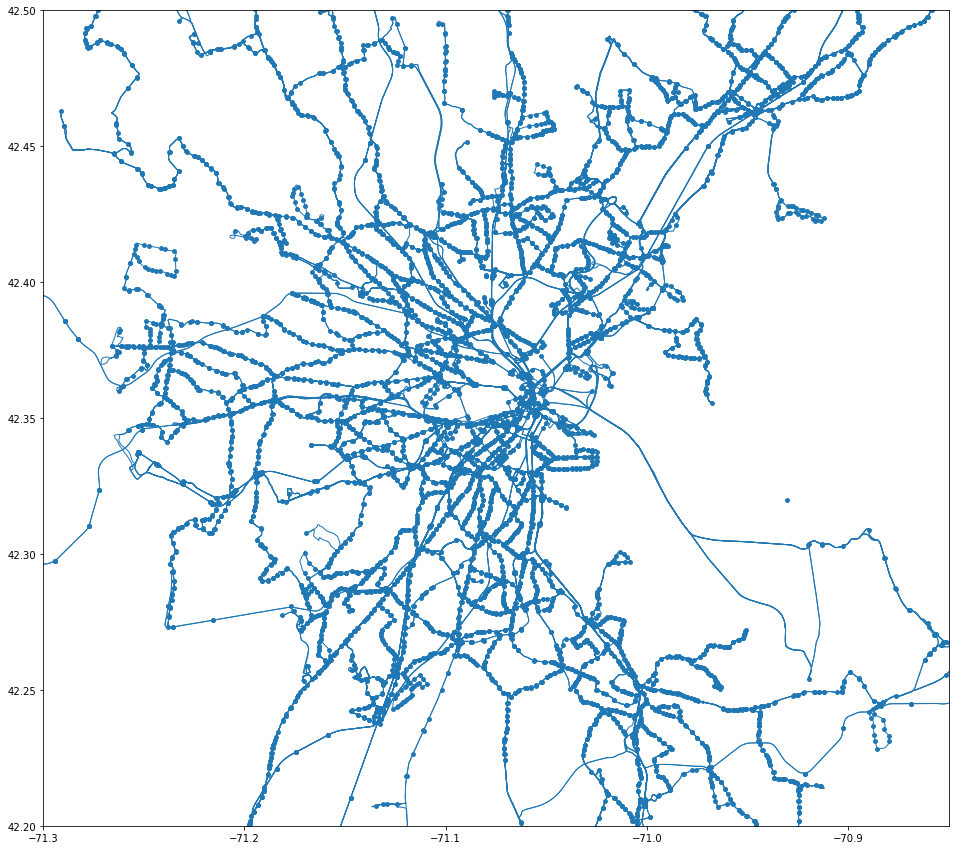

In [49]:
fig,ax = plt.subplots(figsize=(20,15))
# ax = plt.axes(projection=ccrs.Mercator())
S.plot(
    ax=ax
    ,marker='o'
    ,markersize=15)
L.plot(
    ax=ax
    ,lw=1
    )
ax.set_xlim(-71.30,-70.85)
ax.set_ylim( 42.20, 42.5)
fig.show()

In [54]:
S.head().T.sort_index()

,0,1,2,3,4
at_street,Ruggles Street,Newmarket Square,Temple Place,Randall Street,East Concord Street
coordinates,POINT (-71.08275399999999 42.330957),POINT (-71.068787 42.330555),POINT (-71.062911 42.355692),POINT (-71.07623700000001 42.331591),POINT (-71.07128 42.335017)
lat,42.330957,42.330555,42.355692,42.331591,42.335017
level_id,NaN,NaN,NaN,NaN,NaN
lng,-71.082754,-71.068787,-71.062911,-71.076237,-71.07128
location_type,0,0,0,0,0
municipality,Boston,Boston,Boston,Boston,Boston
on_street,Washington Street,Theodore Glynn Way,Tremont Street,Albany Street,Albany Street
parent_station,NaN,NaN,NaN,NaN,NaN
platform_code,NaN,NaN,NaN,NaN,NaN


In [78]:

LL = (
    L
    .merge(
        gtfs['trips']
        .loc[:,['route_id','shape_id']]
        .drop_duplicates()
        .set_index('shape_id')
        ,left_index=True,right_index=True
    )
    .merge(
        gtfs['routes']
        .set_index('route_id')
        ,left_on='route_id',right_index=True
    )
)
LL.head().T.sort_index()

shape_id,010090,010091,040044,040052,040053
agency_id,1,1,1,1,1
coordinates,"LINESTRING (-71.083876 42.329848, -71.083268 4...","LINESTRING (-71.11817000000001 42.373178, -71....","LINESTRING (-71.03202 42.345163, -71.032962 42...","LINESTRING (-71.060044 42.366085, -71.06022400...","LINESTRING (-71.062265 42.364695, -71.06241 42..."
line_id,line-1,line-1,line-4,line-4,line-4
listed_route,NaN,NaN,NaN,NaN,NaN
route_color,FFC72C,FFC72C,FFC72C,FFC72C,FFC72C
route_desc,Key Bus,Key Bus,Commuter Bus,Commuter Bus,Commuter Bus
route_fare_class,Local Bus,Local Bus,Local Bus,Local Bus,Local Bus
route_id,1,1,4,4,4
route_long_name,Harvard Square - Nubian Station,Harvard Square - Nubian Station,North Station - Tide Street,North Station - Tide Street,North Station - Tide Street
route_short_name,1,1,4,4,4


/var/folders/tg/m680dzfs3g5_drds39mj979h0000gn/T/ipykernel_96516/518199358.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


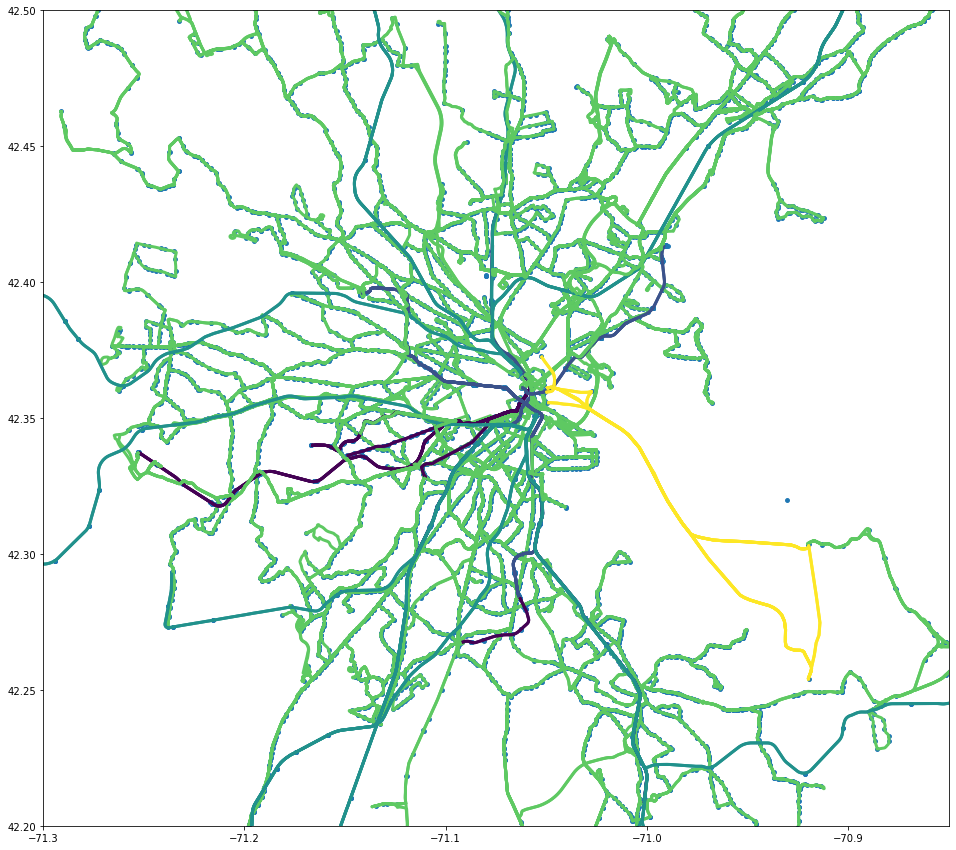

In [80]:
fig,ax = plt.subplots(figsize=(20,15))
# ax = plt.axes(projection=ccrs.Mercator())
S.plot(
    ax=ax
    ,marker='o'
    ,markersize=15)
LL.plot(
    ax=ax
    ,column='route_type'
    ,lw=3
    )
ax.set_xlim(-71.30,-70.85)
ax.set_ylim( 42.20, 42.5)
fig.show()